In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()


In [78]:
file_path = 'bank-additional-full.csv'
df = pd.read_csv(file_path,sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [80]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## **1. Analyzing the data Set**

In [81]:
# cheak null value
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

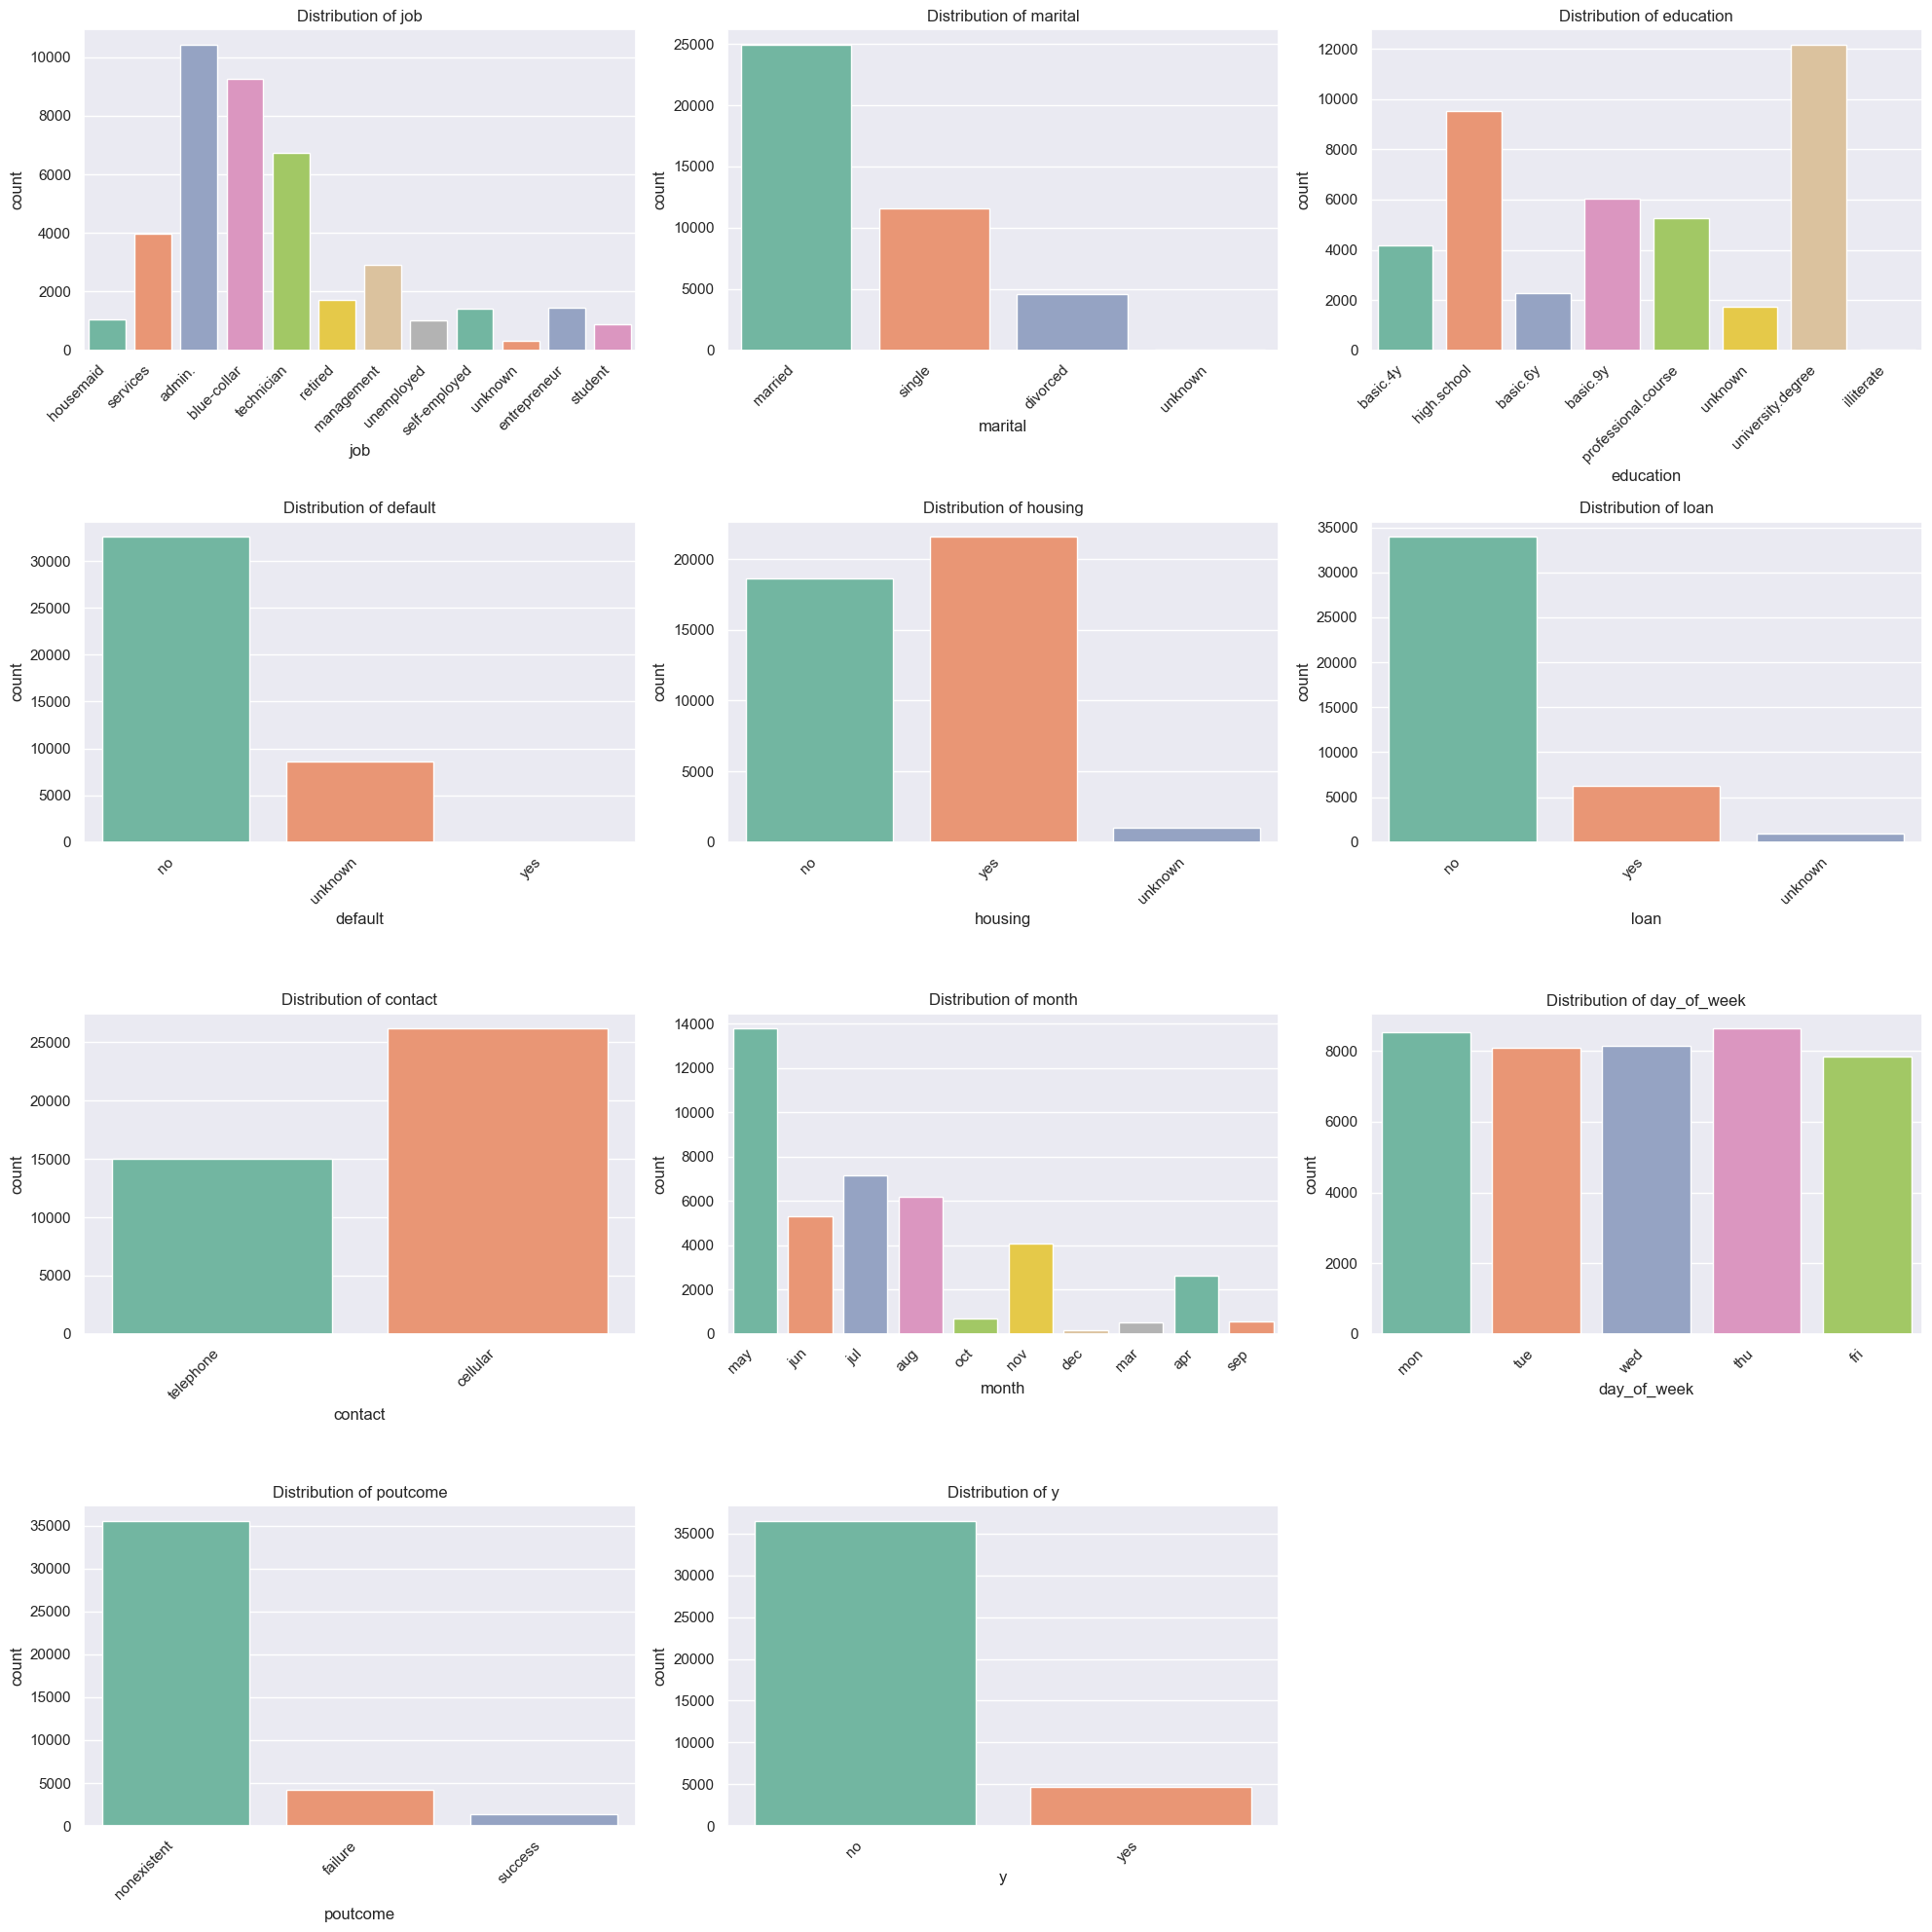

In [82]:
categorical_columns = df.select_dtypes(include="object").columns


#categorical features visual
n_cols = 3  
n_rows = (len(categorical_columns) // n_cols) + 1  


plt.figure(figsize=(20, 5 * n_rows))
plt_number = 1

for column in categorical_columns:
    
    ax = plt.subplot(n_rows, n_cols, plt_number)
    
    sns.countplot(x=column, data=df, hue=column, palette='Set2', legend=False)  # Assign column to hue
    

    plt.xlabel(column)  
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45, ha='right')  
    plt_number += 1

plt.tight_layout()

plt.show()


**Findings**
 - we can find the categories of the categorical fetures and the count of it using this
 - data we can understand the type of clients and the backround of them 
 - outcome of the previous marketing campaign
 - number the client subscribed a term deposit



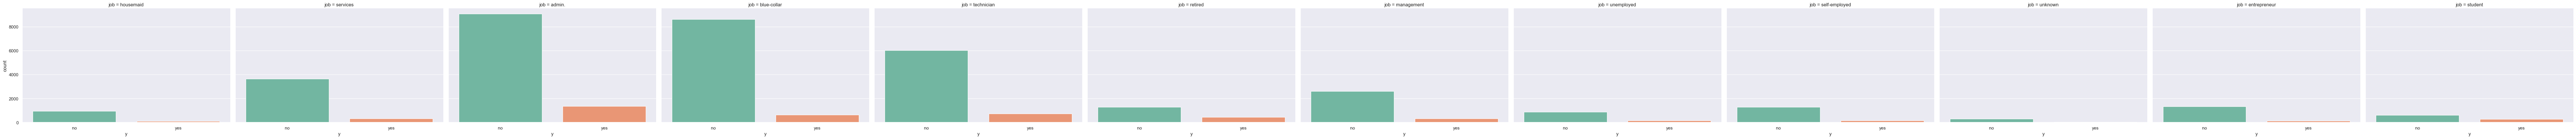

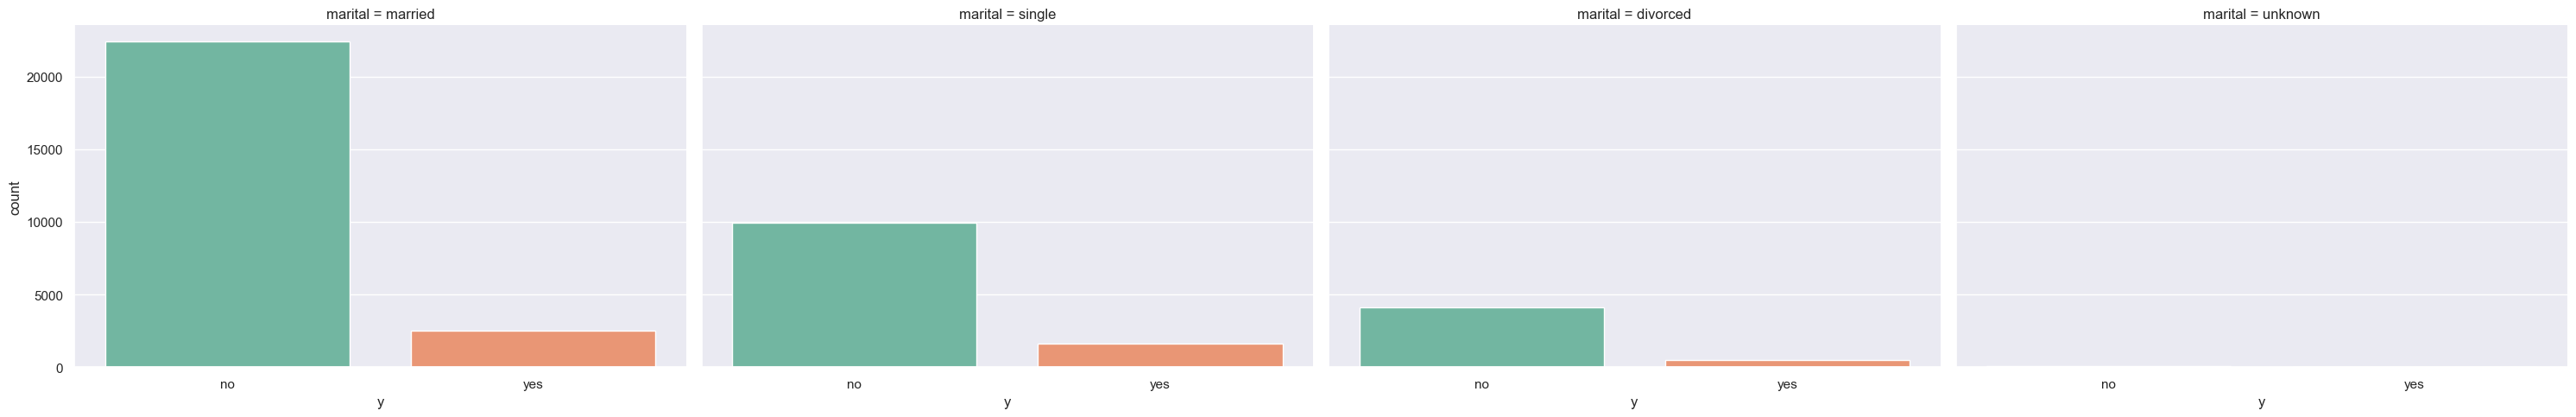

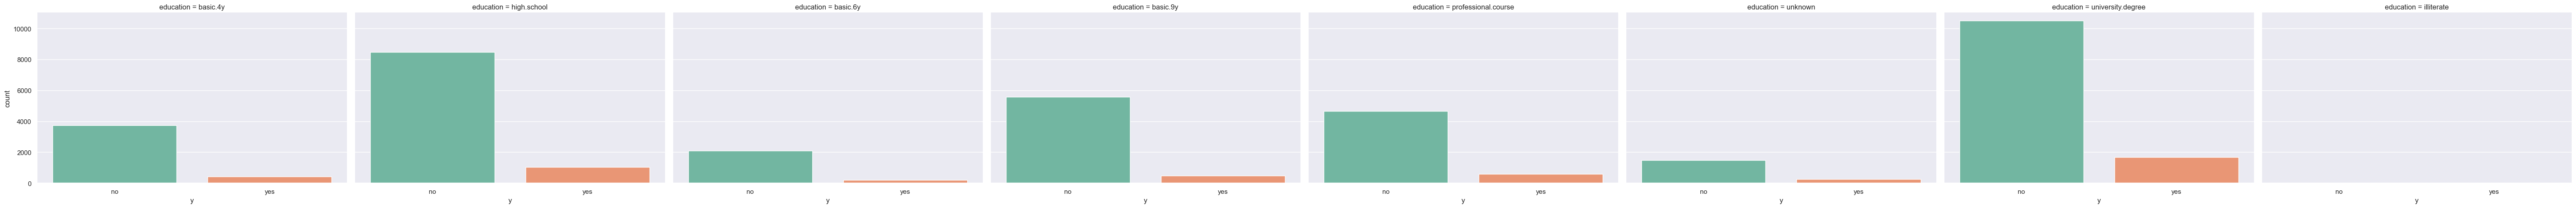

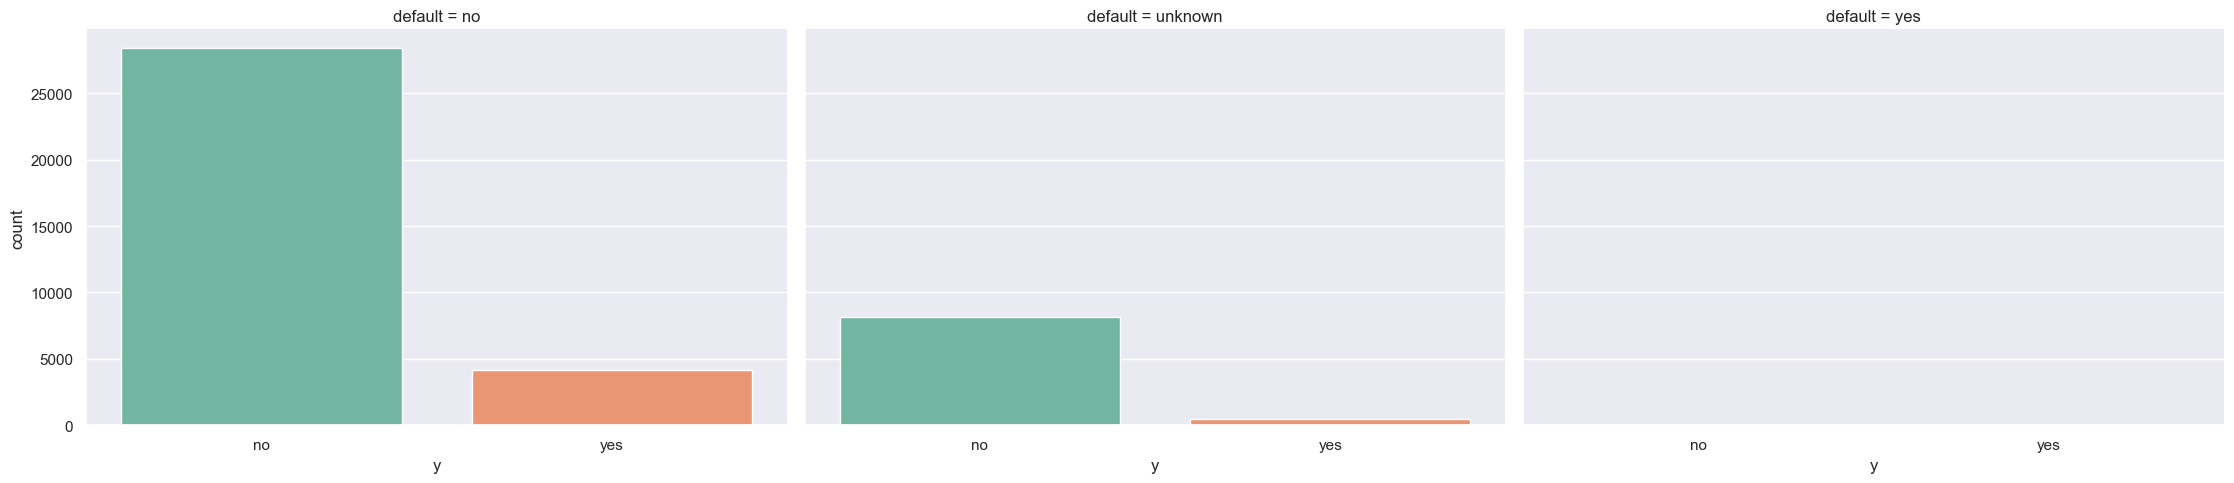

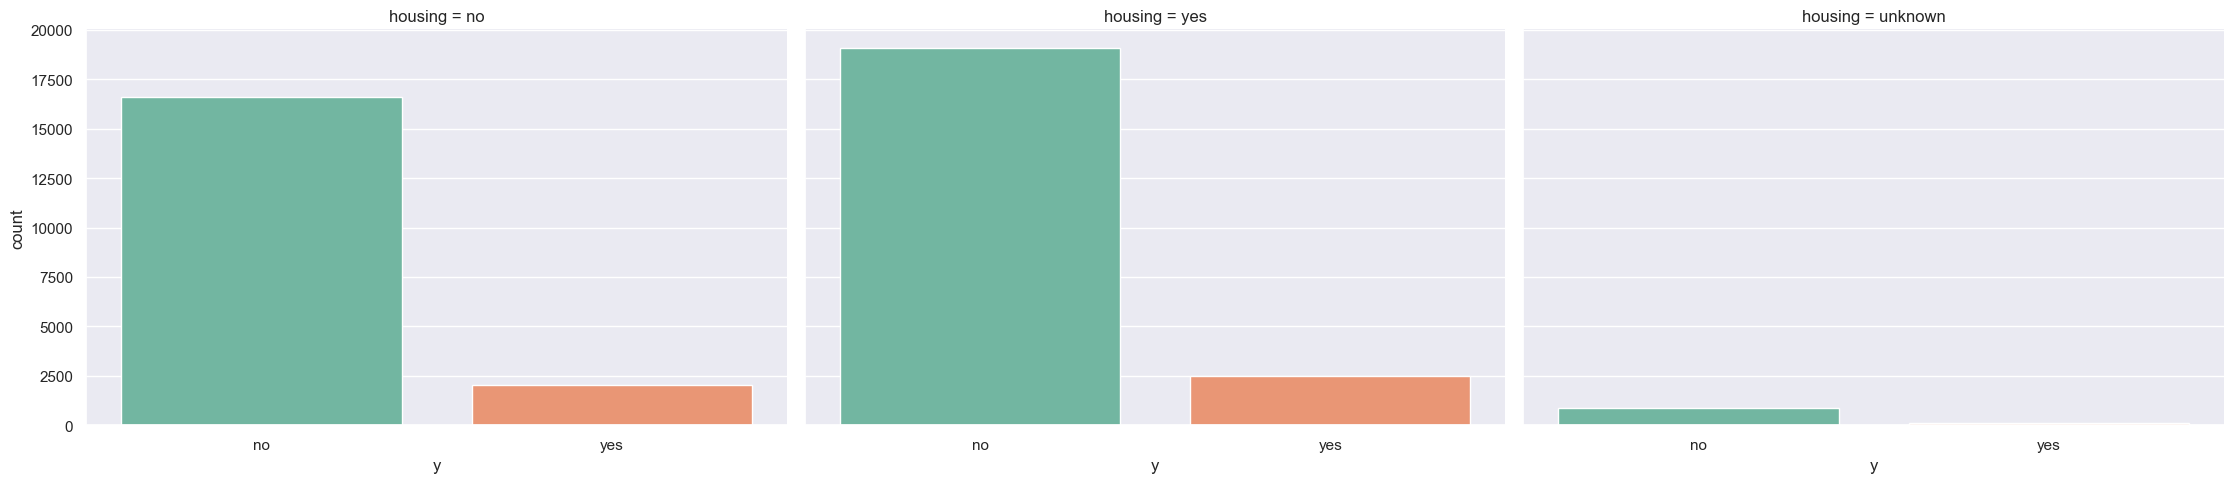

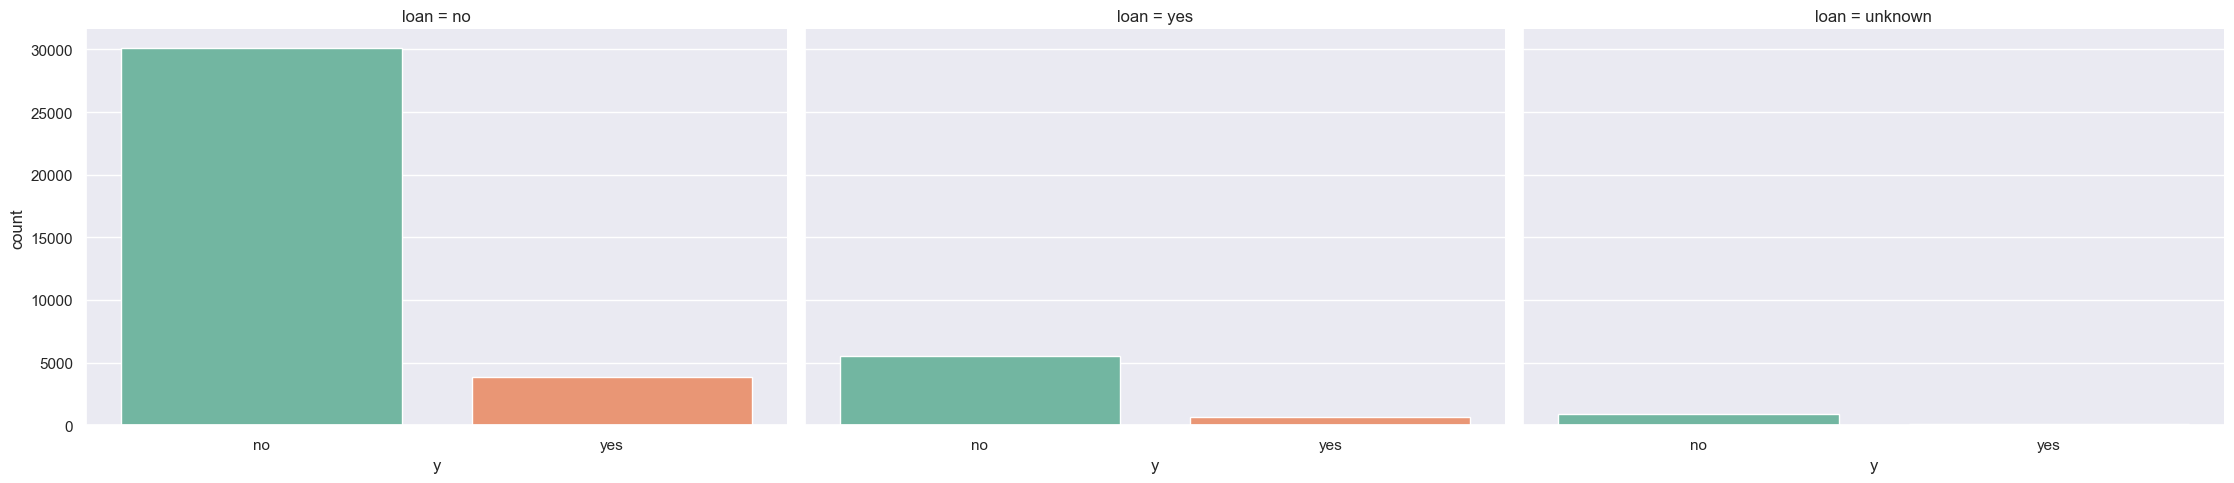

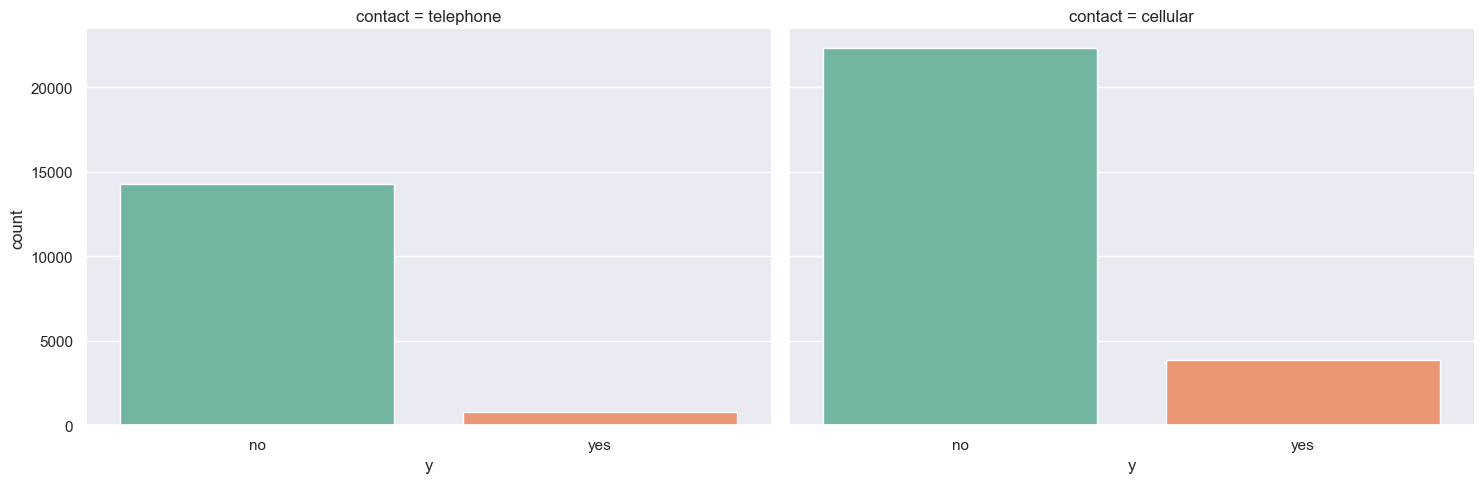

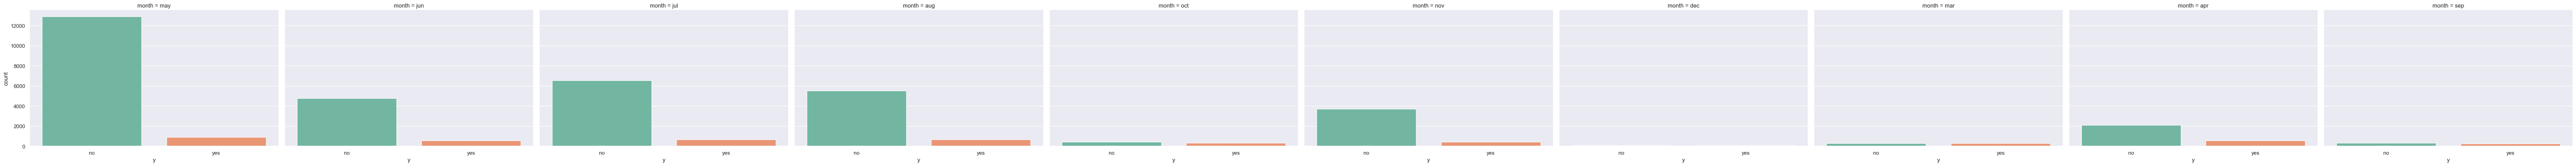

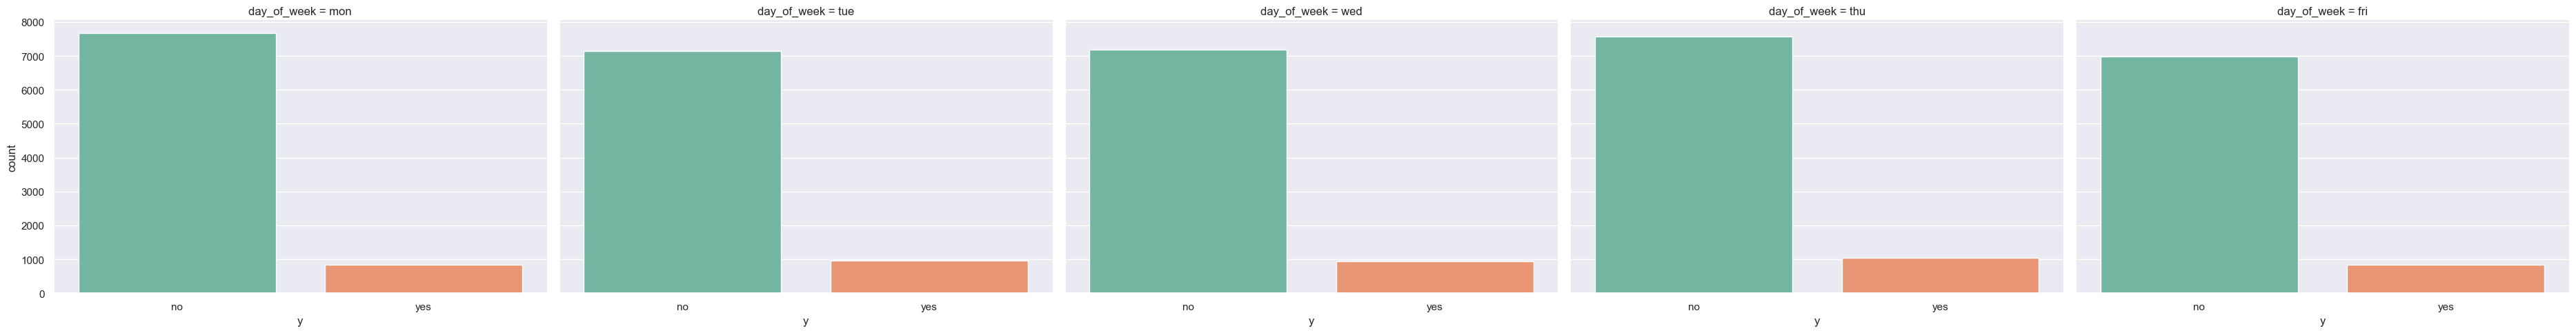

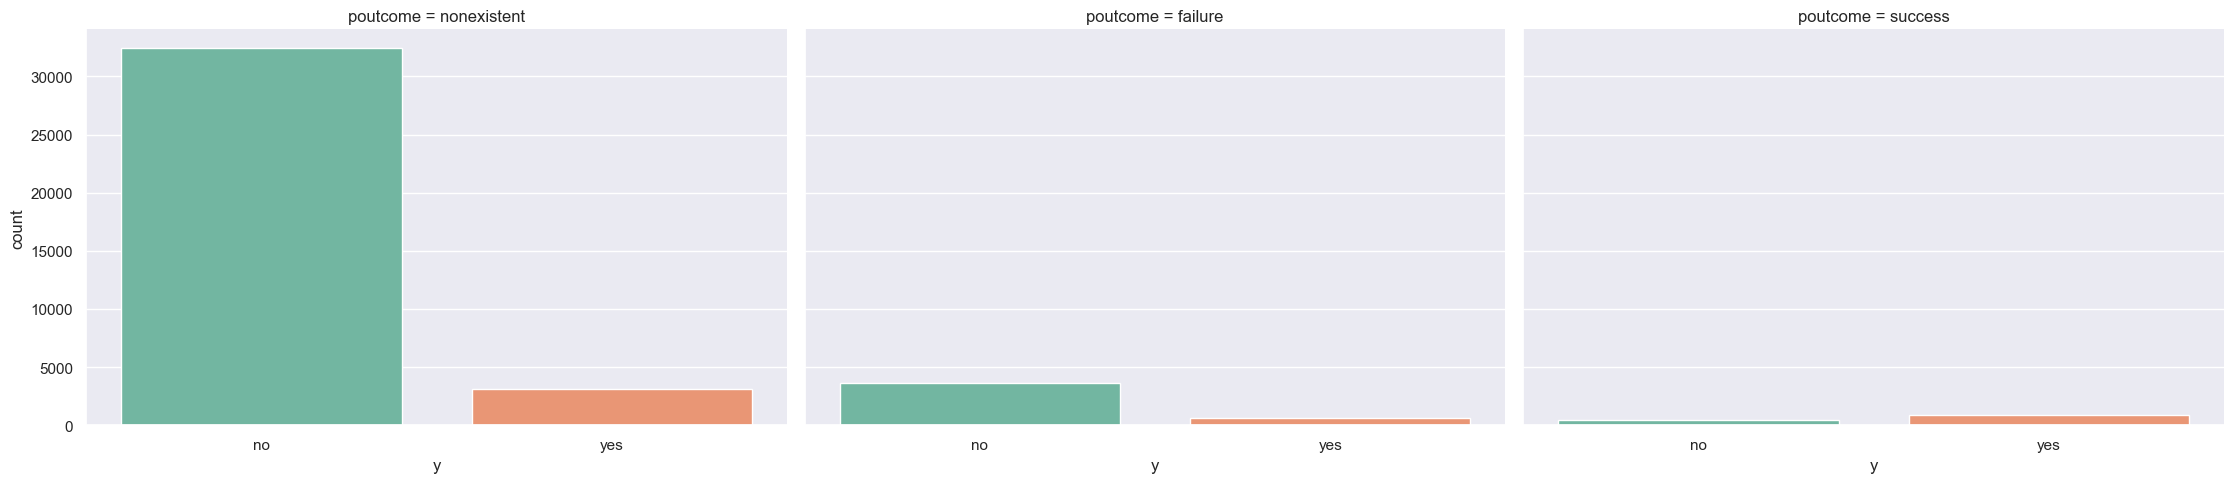

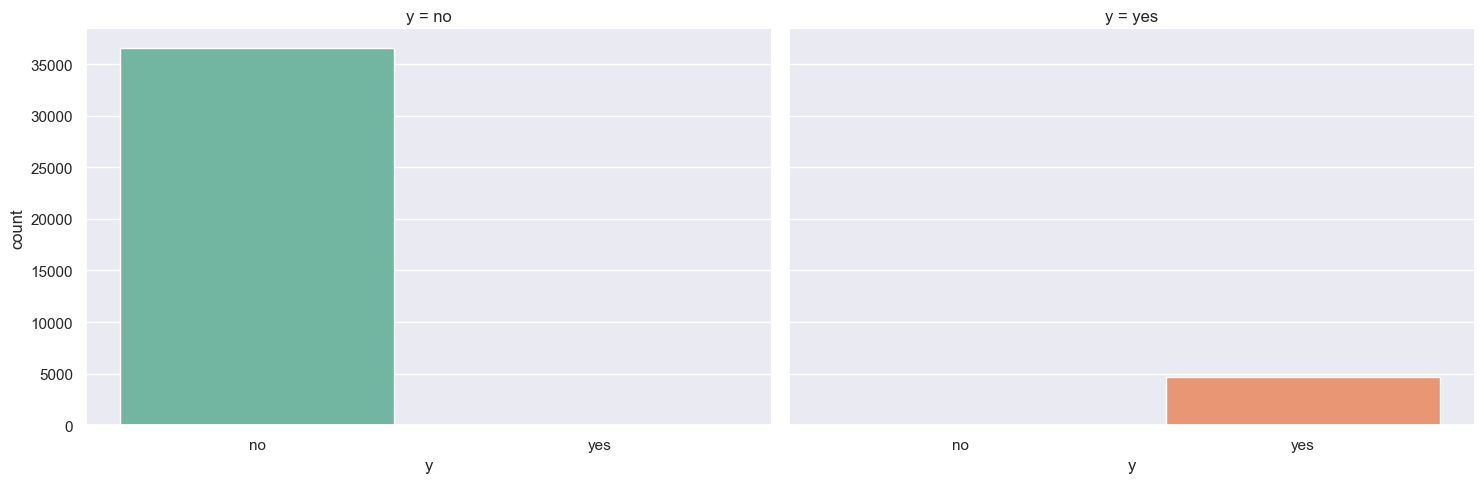

In [83]:
# categorical features and the target
for col in categorical_columns:
    # Create a count plot for the target variable 'y' across each categorical column
    sns.catplot(x="y", hue="y", col=col, kind="count", data=df, height=5, aspect=1.5, palette='Set2', legend=False)

# Show the plots
plt.show()

**Findings**
- according to the client type how many of them subscribe this
- outcome of the pre campaign
- the month clients show there highest interest in deposit

In [84]:
numerical_columns = df.select_dtypes(include=['number']).columns  # Identify categorical columns
for column in numerical_columns:
    print(f"{column}")


age
duration
campaign
pdays
previous
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed


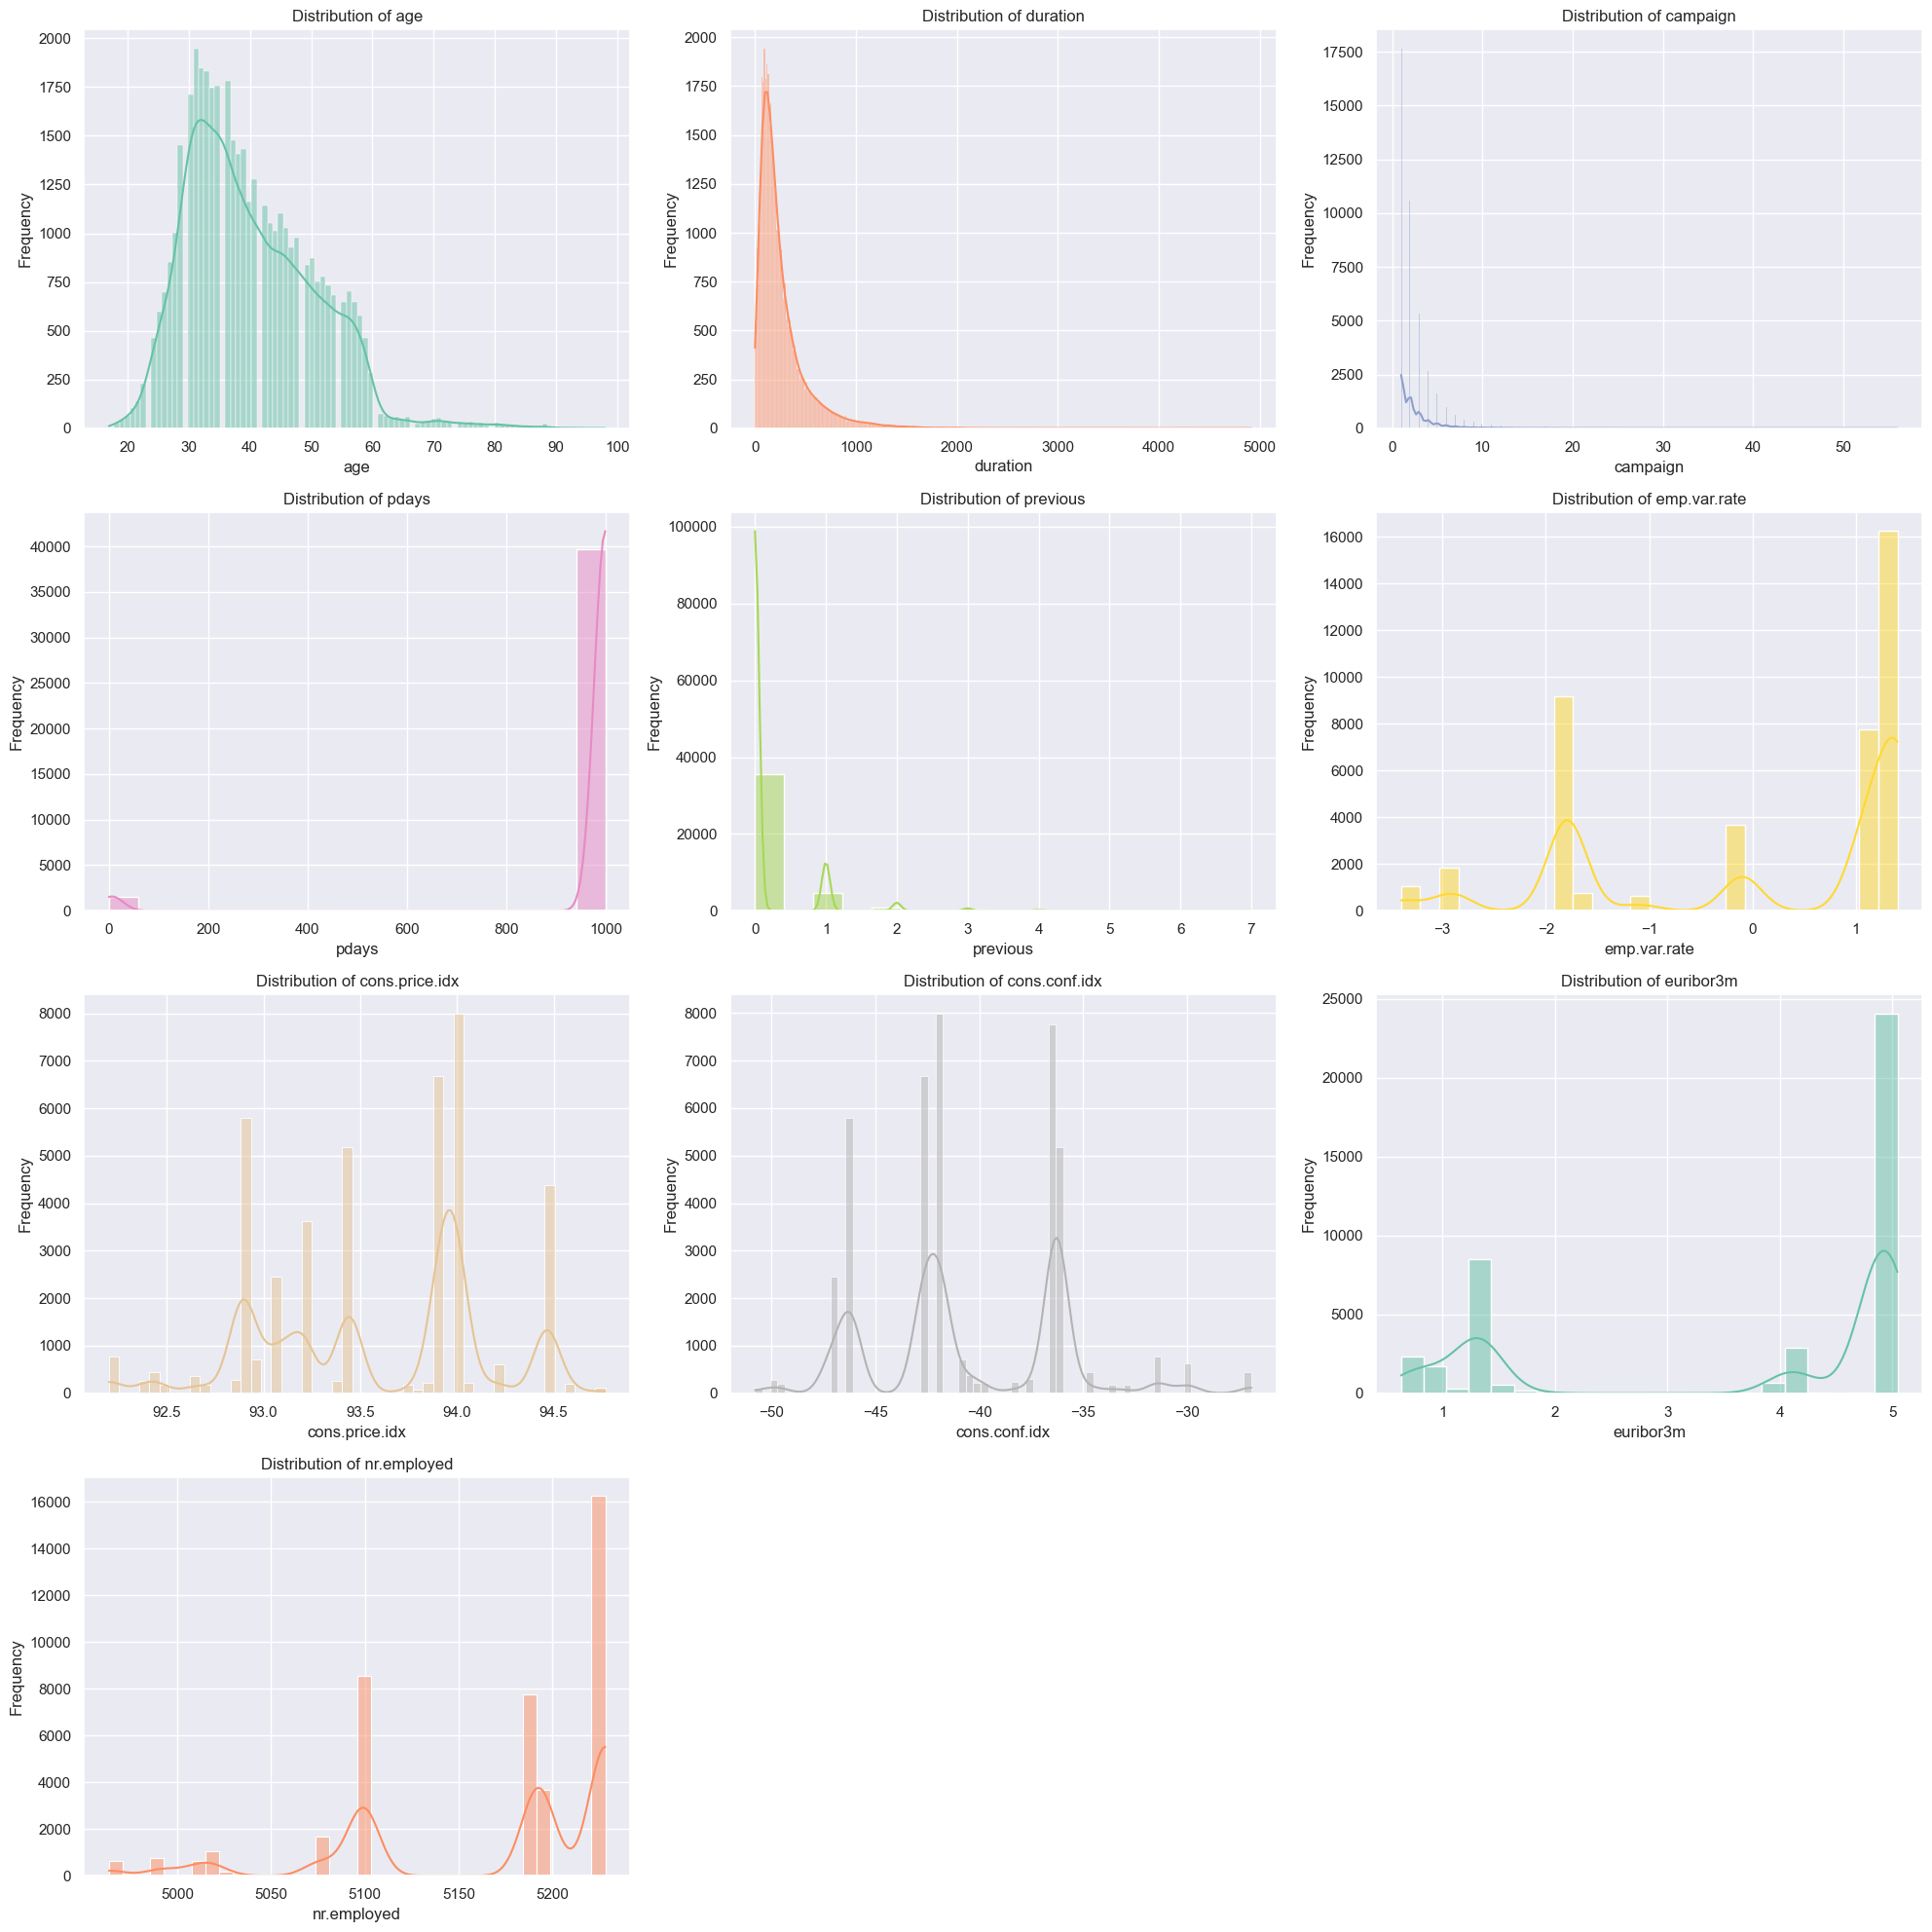

In [85]:

colors = sns.color_palette("Set2", n_colors=len(numerical_columns))

# Set up the figure with enough space for all plots
n_cols = 3  # You can change the number of columns as needed
n_rows = (len(numerical_columns) // n_cols) + 1  # Calculate number of rows

plt.figure(figsize=(20, 5 * n_rows))  # Adjust the figure size based on number of rows
plt_number = 1

# Loop through numerical columns and create histograms with KDE and different colors
for idx, col in enumerate(numerical_columns):
    ax = plt.subplot(n_rows, n_cols, plt_number)
    sns.histplot(df[col], kde=True, color=colors[idx])  # Use a different color for each plot
    plt.xlabel(col)  
    plt.ylabel('Frequency')  
    plt.title(f'Distribution of {col}') 
    plt_number += 1

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

**Findings**
- in some distribtion thy seems to have outliers

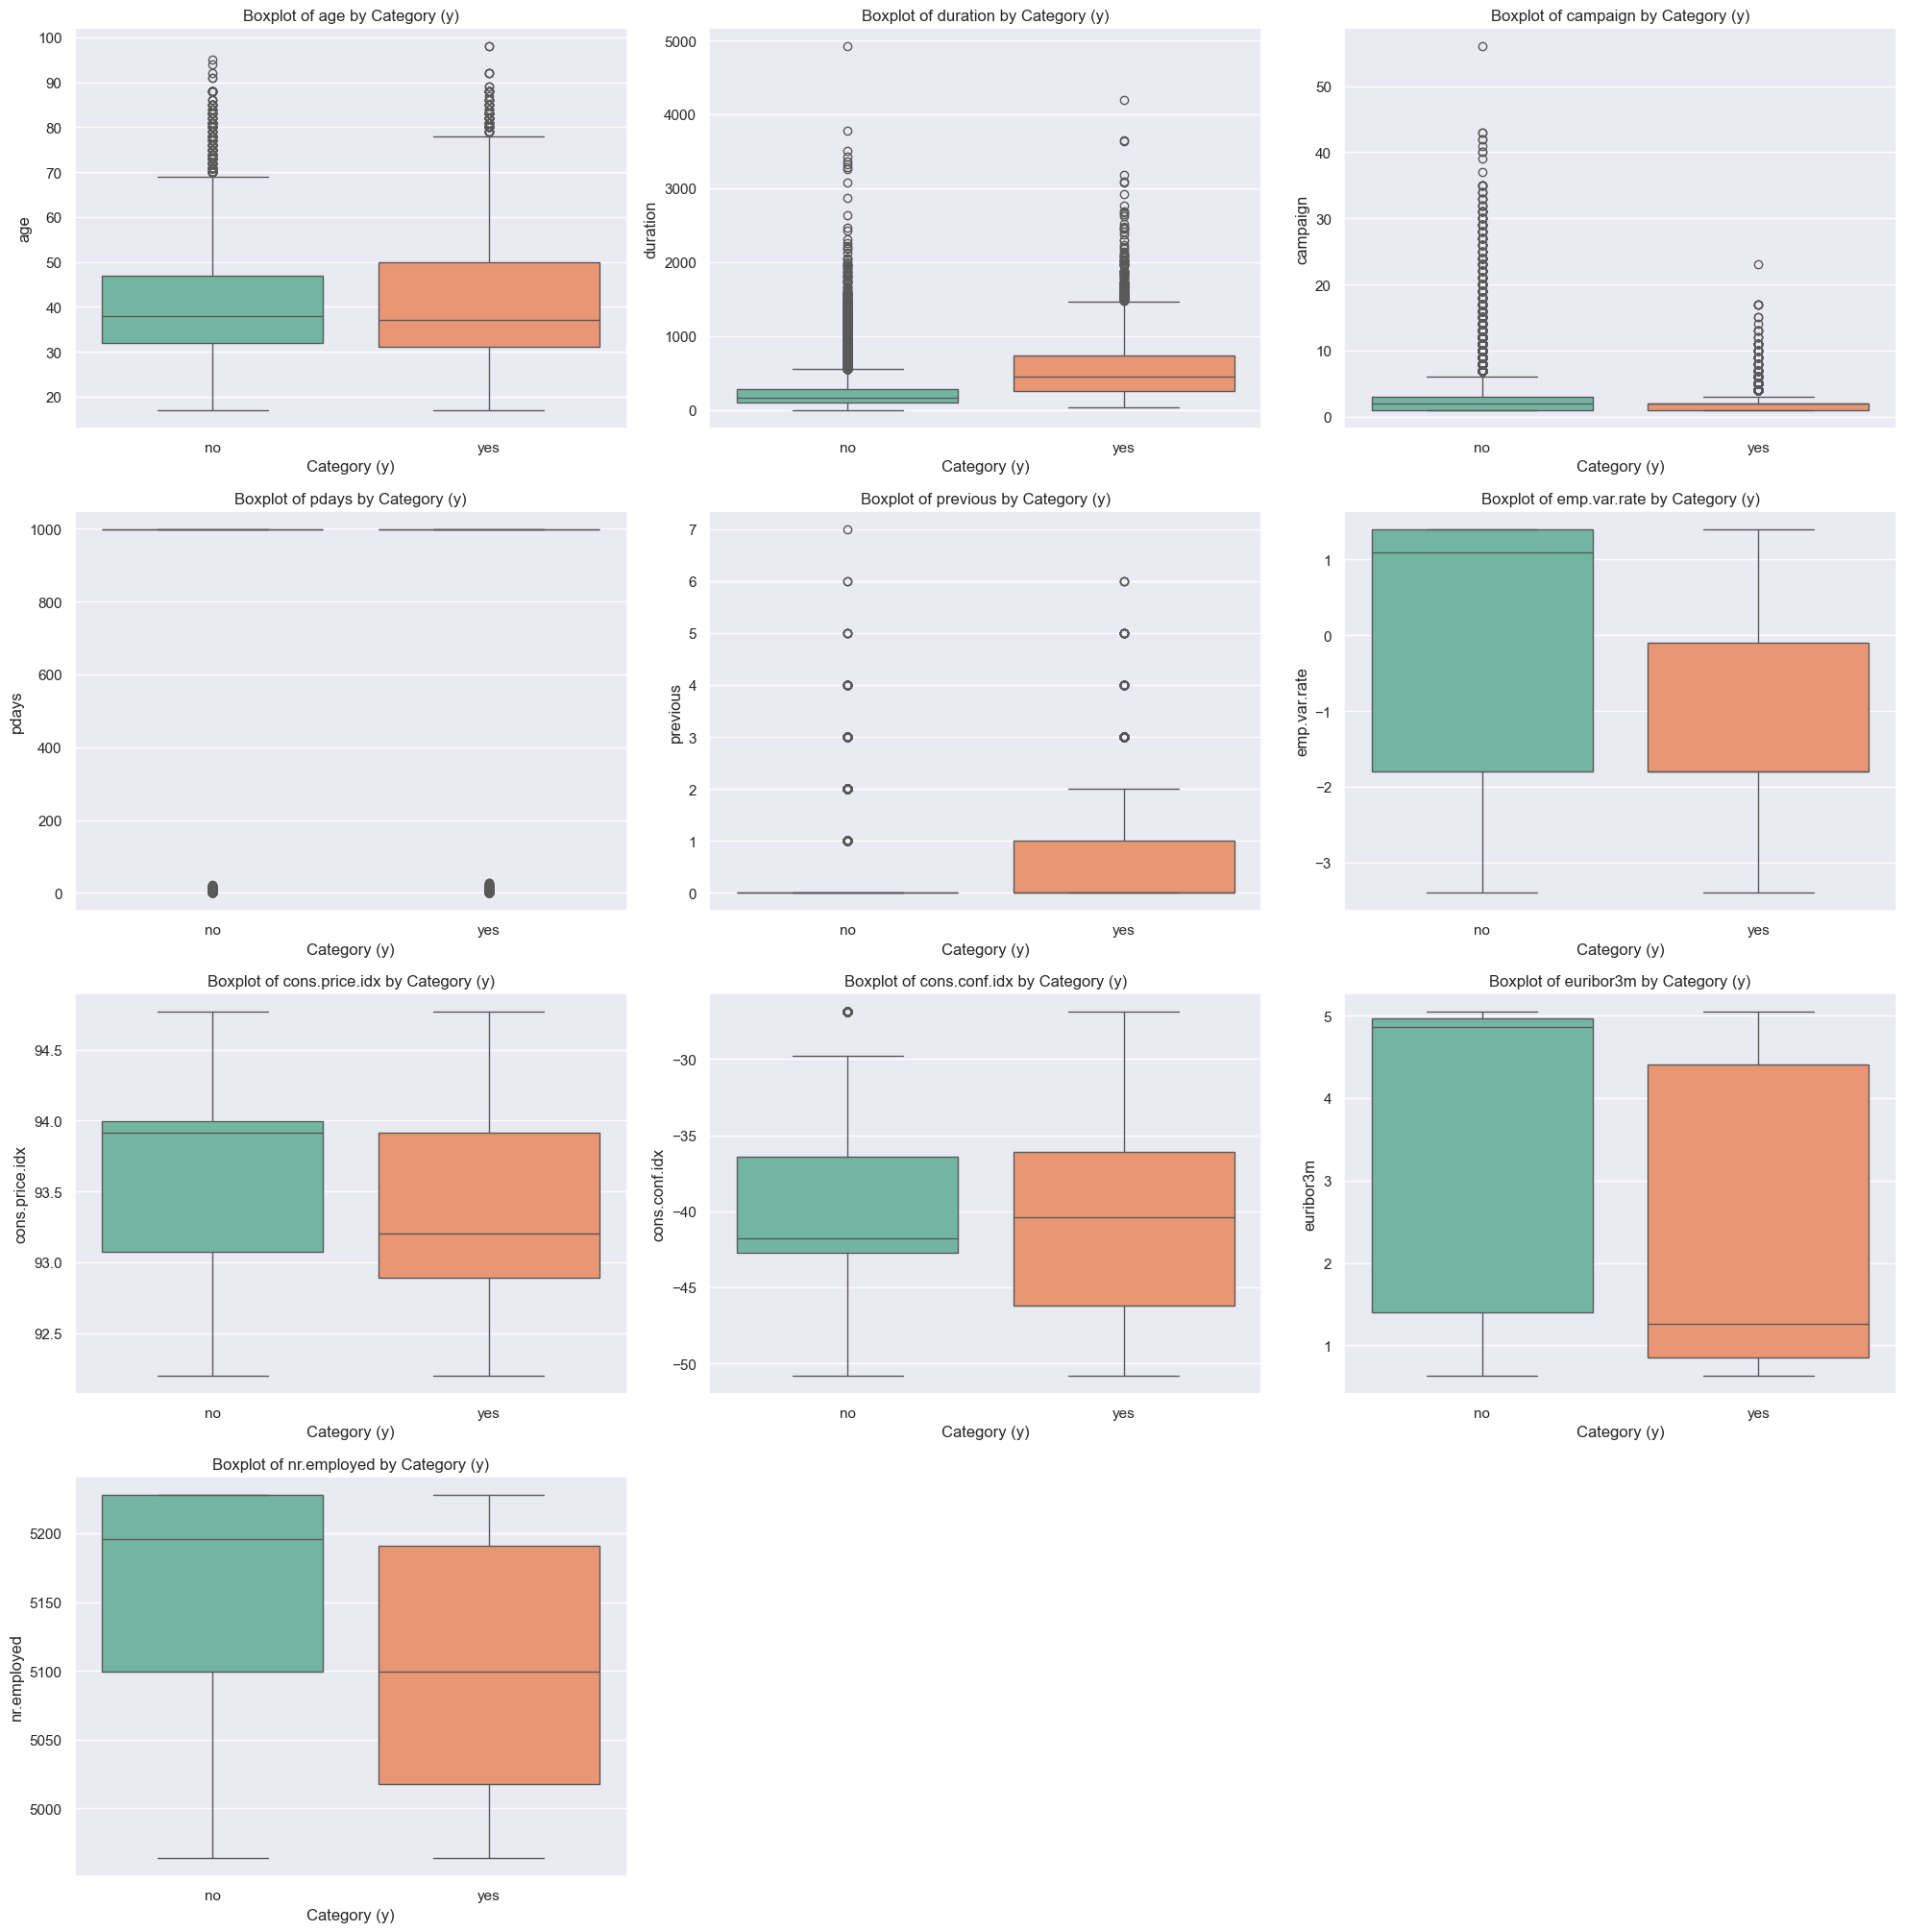

In [86]:
plt.figure(figsize=(20, 60))
plt_number = 1

# Define a custom color palette for the categories in 'y'
palette = sns.color_palette("Set2", n_colors=len(df['y'].unique()))

# Loop through numerical columns and create a boxplot for each one
for col in numerical_columns:
    ax = plt.subplot(12, 3, plt_number)
    sns.boxplot(x='y', y=col, hue='y', data=df, palette=palette)  # Pass the data argument
    plt.xlabel('Category (y)')  # Label for the x-axis
    plt.ylabel(col)  # Label for the y-axis with the name of the numerical column
    plt.title(f'Boxplot of {col} by Category (y)')  # Title for each boxplot
    plt_number += 1

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


**Findings**
-  which range of the clients doing the deposits  in there features like age, balance and etc

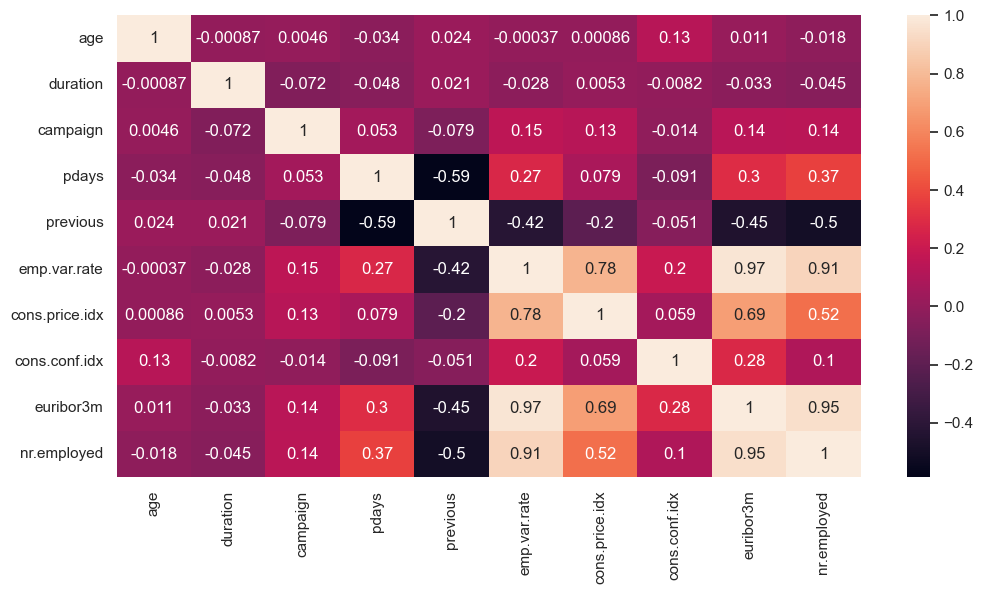

In [87]:
# Correlation between numerical fetures
cor = df.select_dtypes(include=['number']).corr()
fig = plt.figure(figsize=(12,6))
sns.heatmap(cor, annot= True)

plt.show()


**Findings**
- From the above heatmap we can find there is not much of correlation between the features

## **2. Feature Engneering**

In [88]:
df2 = df.copy()
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [89]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [90]:
df2.drop('duration', axis=1, inplace=True)


**Explanation**
- the duration is not known before a call is performed. Also, after the end of the call y is obviously known

In [91]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [92]:
df2['education'].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [93]:
df_encoded = pd.get_dummies(df2, columns=['job', 'marital', 'contact', 'month', 'poutcome','day_of_week'])



In [94]:
education_mapping = {
    'illiterate': 1,
    'unknown': 2,
    'basic.4y': 3,
    'basic.6y': 4,
    'basic.9y': 5,
    'high.school': 6,
    'professional.course': 7,
    'university.degree': 8
}

# Apply the mapping to the 'education' column
df_encoded['education'] = df2['education'].map(education_mapping)


In [95]:
from sklearn.preprocessing import StandardScaler

binary_col = ['housing','loan','default','y']
for col in binary_col:
    df_encoded[col] = df_encoded[col].apply(lambda x : True if x == 'yes' else False)


    

In [96]:
df_encoded

,age,education,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,3,False,False,False,1,999,0,1.1,93.994,...,False,False,False,True,False,False,True,False,False,False
1,57,6,False,False,False,1,999,0,1.1,93.994,...,False,False,False,True,False,False,True,False,False,False
2,37,6,False,True,False,1,999,0,1.1,93.994,...,False,False,False,True,False,False,True,False,False,False
3,40,4,False,False,False,1,999,0,1.1,93.994,...,False,False,False,True,False,False,True,False,False,False
4,56,6,False,False,True,1,999,0,1.1,93.994,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,7,False,True,False,1,999,0,-1.1,94.767,...,False,False,False,True,False,True,False,False,False,False
41184,46,7,False,False,False,1,999,0,-1.1,94.767,...,False,False,False,True,False,True,False,False,False,False
41185,56,8,False,True,False,2,999,0,-1.1,94.767,...,False,False,False,True,False,True,False,False,False,False
41186,44,7,False,False,False,1,999,0,-1.1,94.767,...,False,False,False,True,False,True,False,False,False,False


In [97]:
df_encoded['education']

0        3
1        6
2        6
3        4
4        6
        ..
41183    7
41184    7
41185    8
41186    7
41187    7
Name: education, Length: 41188, dtype: int64

In [98]:
df_encoded.columns

Index(['age', 'education', 'default', 'housing', 'loan', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed'],
      dtype='object')

In [99]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41188 non-null  int64  
 1   education             41188 non-null  int64  
 2   default               41188 non-null  bool   
 3   housing               41188 non-null  bool   
 4   loan                  41188 non-null  bool   
 5   campaign              41188 non-null  int64  
 6   pdays                 41188 non-null  int64  
 7   previous              41188 non-null  int64  
 8   emp.var.rate          41188 non-null  float64
 9   cons.price.idx        41188 non-null  float64
 10  cons.conf.idx         41188 non-null  float64
 11  euribor3m             41188 non-null  float64
 12  nr.employed           41188 non-null  float64
 13  y                     41188 non-null  bool   
 14  job_admin.            41188 non-null  bool   
 15  job_blue-collar    

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Separate features and target
X = df_encoded.drop(columns=["y"])  # Replace "target" with your actual target column name
y = df_encoded["y"]
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training Without Balanced Dataset

In [101]:

from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(np.array(X_train, dtype=np.float32))
X_test = scaler.transform(X_test)


# Define the model
model_no_bal = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define input shape explicitly
    Dense(64, activation='relu'),     # Hidden layer 1
    Dense(32, activation='relu'),     # Hidden layer 2
    Dense(1, activation='sigmoid')    # Output layer for binary classification
])

# Compile the model
model_no_bal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model_no_bal.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
    
)

# Evaluate the model
results = model_no_bal.evaluate(X_test, y_test)
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

Epoch 1/20


C:\Users\aashi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


1030/1030 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8746 - loss: 0.3275 - val_accuracy: 0.8956 - val_loss: 0.2899
Epoch 2/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9020 - loss: 0.2744 - val_accuracy: 0.8971 - val_loss: 0.2879
Epoch 3/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9050 - loss: 0.2656 - val_accuracy: 0.8927 - val_loss: 0.2887
Epoch 4/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9030 - loss: 0.2668 - val_accuracy: 0.8944 - val_loss: 0.2899
Epoch 5/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9062 - loss: 0.2610 - val_accuracy: 0.8929 - val_loss: 0.2873
Epoch 6/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9098 - loss: 0.2531 - val_accuracy: 0.8961 - val_loss: 0.2876
Epoch 7/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9071 - loss: 0.2579 - val_accuracy: 0.8958 - val_loss: 0.2894
Epoch 8/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9083 - loss: 0.2569 - val_accurac

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8941 - loss: 0.2888

Neural Network Test Loss: 0.2873219847679138
Neural Network Test Accuracy: 0.8929351568222046
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7303
           1       0.55      0.29      0.38       935

    accuracy                           0.89      8238
   macro avg       0.73      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238


Confusion Matrix (Neural Network):
[[7084  219]
 [ 663  272]]


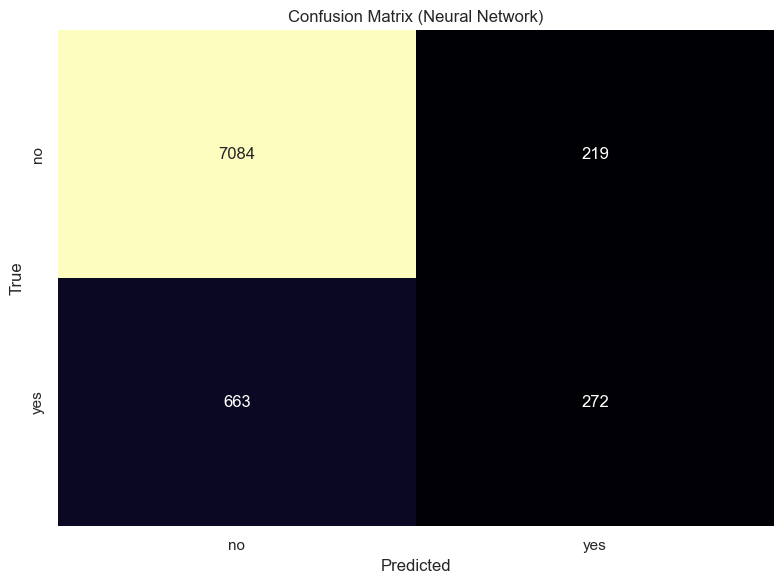

In [102]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Evaluate the Neural Network model
results_nn = model_no_bal.evaluate(X_test, y_test)
print("\nNeural Network Test Loss:", results_nn[0])
print("Neural Network Test Accuracy:", results_nn[1])

# Make predictions using the Neural Network model
y_pred_nn = (model_no_bal.predict(X_test) > 0.5).astype("int32")

# Evaluate the Neural Network model using metrics
print("\nClassification Report (Neural Network):")
print(classification_report(y_test, y_pred_nn))

print("\nConfusion Matrix (Neural Network):")
print(confusion_matrix(y_test, y_pred_nn))

# Confusion matrix for Neural Network predictions
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Plot the confusion matrix with a different color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='magma', cbar=False, xticklabels=df["y"].unique(), yticklabels=df["y"].unique())

plt.title('Confusion Matrix (Neural Network)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


In [103]:
from sklearn.ensemble import RandomForestClassifier


rf_model_no_bal = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_depth=None,         # Maximum depth of trees, None means no limit
    random_state=42,        # Random seed for reproducibility
    class_weight='balanced' # Handle class imbalance
)

# Train the model
rf_model_no_bal.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model_no_bal.predict(X_test)




Accuracy: 0.8891721291575625

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7303
           1       0.52      0.29      0.37       935

    accuracy                           0.89      8238
   macro avg       0.72      0.63      0.66      8238
weighted avg       0.87      0.89      0.87      8238


Confusion Matrix:
[[7055  248]
 [ 665  270]]


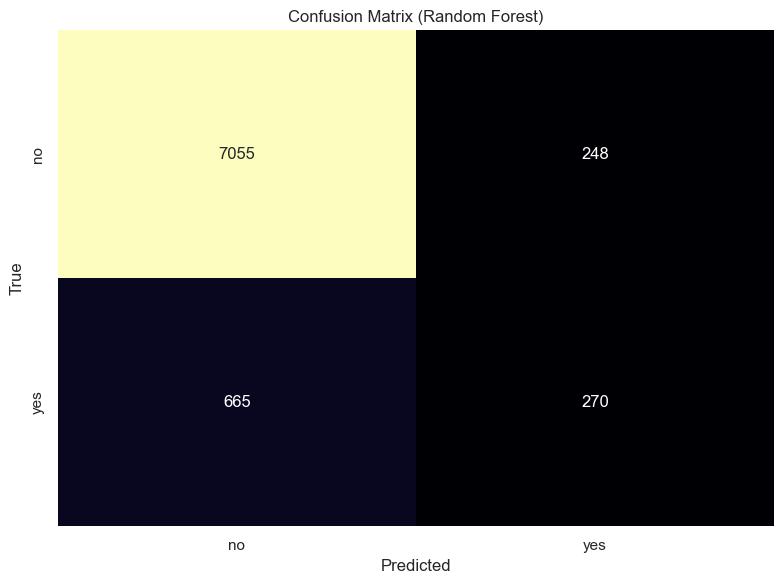

In [104]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

# Plot the confusion matrix with a color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='magma', cbar=False, xticklabels=df["y"].unique(), yticklabels=df["y"].unique())

plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

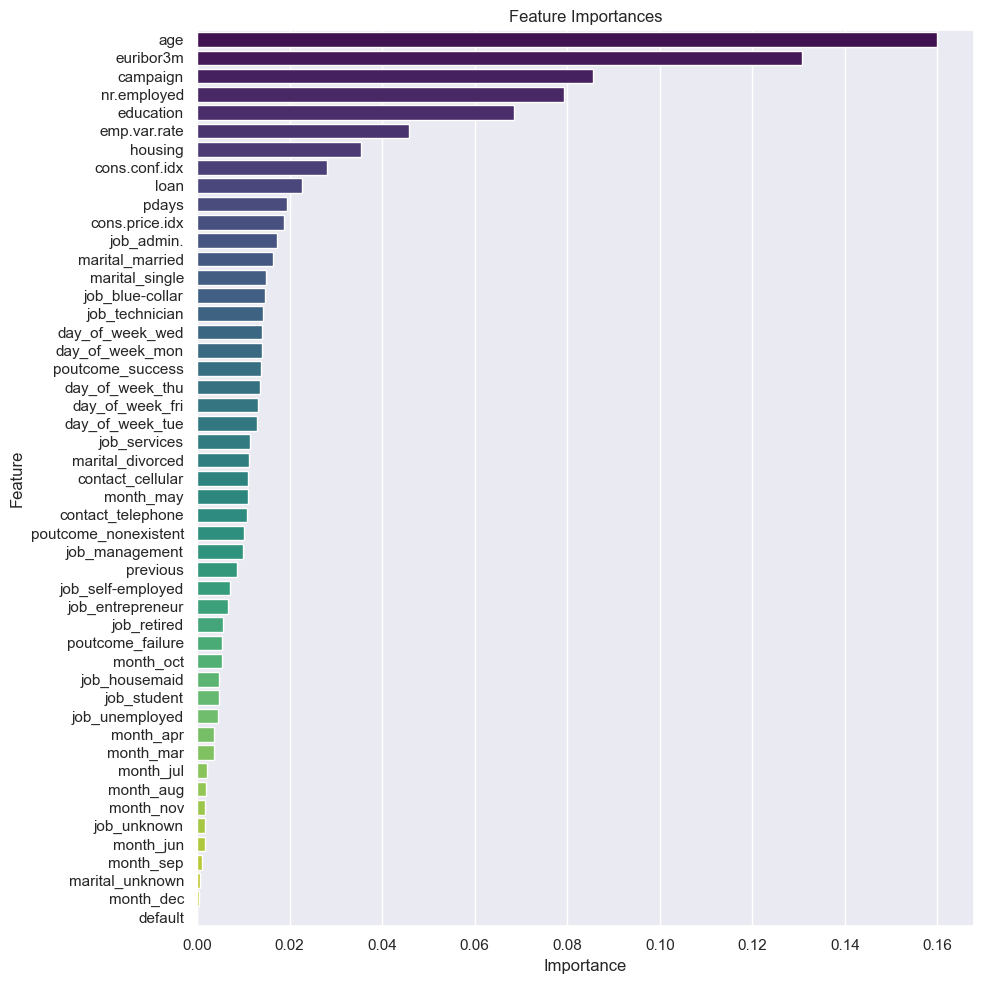

In [105]:
# Assuming 'rf_model_no_bal' is your trained RandomForest model, and 'df_encoded' is your dataset
feature_importances = pd.DataFrame({
    'Feature': df_encoded.drop(columns=["y"]).columns,  # Replace 'y' with your target column name
    'Importance': rf_model_no_bal.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot the feature importances with a different color palette
plt.figure(figsize=(10, 10))

# Adding 'hue' to resolve the deprecation warning and control colors
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis', hue='Feature', legend=False)

plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


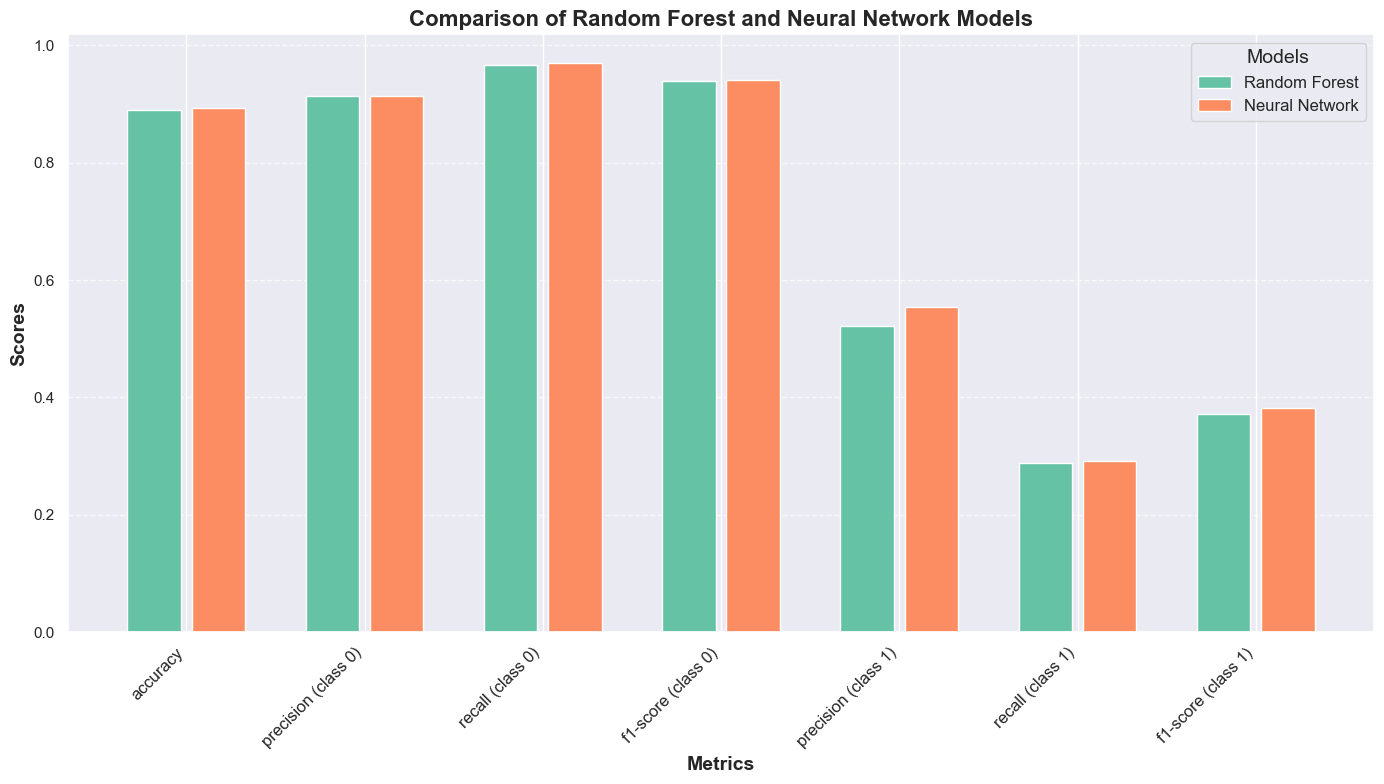

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have the predictions for both models: y_pred_rf and y_pred_nn
# and their respective classification reports

# Generate classification reports for both models
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_nn = classification_report(y_test, y_pred_nn, output_dict=True)

# Extract metrics for both models
metrics = ['accuracy', 'precision (class 0)', 'recall (class 0)', 'f1-score (class 0)', 
           'precision (class 1)', 'recall (class 1)', 'f1-score (class 1)']
model_names = ['Random Forest', 'Neural Network']

# Random Forest metrics
rf_metrics = [
    accuracy_score(y_test, y_pred_rf),  # accuracy
    report_rf['0']['precision'],         # precision for class 0
    report_rf['0']['recall'],            # recall for class 0
    report_rf['0']['f1-score'],         # f1-score for class 0
    report_rf['1']['precision'],         # precision for class 1
    report_rf['1']['recall'],            # recall for class 1
    report_rf['1']['f1-score']          # f1-score for class 1
]

# Neural Network metrics
nn_metrics = [
    results_nn[1],  # accuracy from neural network evaluation
    report_nn['0']['precision'],  # precision for class 0
    report_nn['0']['recall'],     # recall for class 0
    report_nn['0']['f1-score'],   # f1-score for class 0
    report_nn['1']['precision'],  # precision for class 1
    report_nn['1']['recall'],     # recall for class 1
    report_nn['1']['f1-score']    # f1-score for class 1
]

# Set up the bar chart data
bar_width = 0.3  # Slightly reduced bar width
index = np.arange(len(metrics))

# Set a Seaborn color palette
sns.set_palette("Set2")  # You can experiment with different palettes, e.g., "deep", "muted", "pastel", "Set2"

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the data with a smaller gap between the bars
bar1 = ax.bar(index - bar_width/2 - 0.03, rf_metrics, bar_width, label='Random Forest', color=sns.color_palette()[0])
bar2 = ax.bar(index + bar_width/2 + 0.03, nn_metrics, bar_width, label='Neural Network', color=sns.color_palette()[1])

# Adding labels and title with a modern font
ax.set_xlabel('Metrics', fontsize=14, fontweight='bold')
ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
ax.set_title('Comparison of Random Forest and Neural Network Models', fontsize=16, fontweight='bold')

# Customize x-ticks for better readability
ax.set_xticks(index)
ax.set_xticklabels(metrics, rotation=45, ha='right', fontsize=12)

# Add gridlines for better clarity
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a legend with a larger font size
ax.legend(title='Models', fontsize=12, title_fontsize=14)

# Display the plot with a tight layout
plt.tight_layout()
plt.show()


258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step


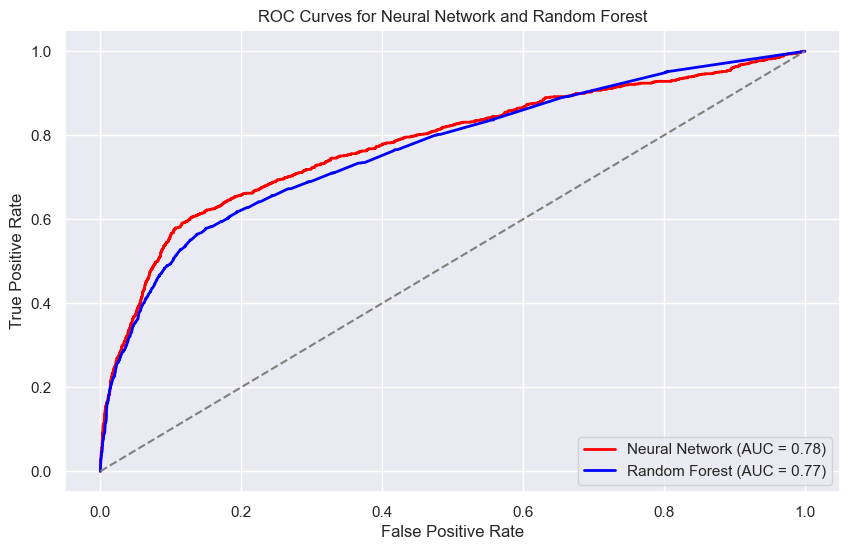

In [107]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for Random Forest (output class probabilities)
y_pred_prob_rf = rf_model_no_bal.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Compute ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Get predicted probabilities for Neural Network (output class probabilities)
y_pred_prob_nn = model_no_bal.predict(X_test)[:, 0]  # Probabilities for class 1

# Compute ROC curve for Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_prob_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot ROC curves for both models
plt.figure(figsize=(10, 6))
plt.plot(fpr_nn, tpr_nn, color='red', lw=2, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Neural Network and Random Forest')
plt.legend(loc="lower right")
plt.show()




### Training using ballanced dataset (SWOT)

Original dataset class distribution: Counter({0: 29245, 1: 3705})
Resampled dataset class distribution: Counter({0: 29245, 1: 29245})


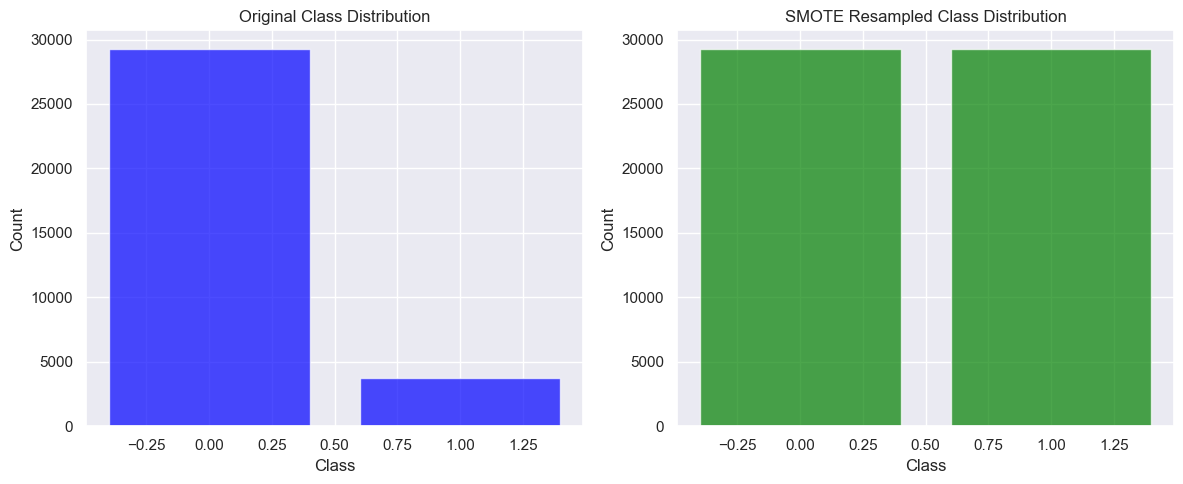

In [108]:
from imblearn.over_sampling import SMOTE
from collections import Counter
original_distribution = Counter(y_train)
print(f"Original dataset class distribution: {original_distribution}")

# Step 2: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
resampled_distribution = Counter(y_resampled)
print(f"Resampled dataset class distribution: {resampled_distribution}")

# Step 3: Plot the original and new class distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Original distribution bar chart
ax[0].bar(original_distribution.keys(), original_distribution.values(), color='blue', alpha=0.7)
ax[0].set_title("Original Class Distribution")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Count")

# Resampled distribution bar chart
ax[1].bar(resampled_distribution.keys(), resampled_distribution.values(), color='green', alpha=0.7)
ax[1].set_title("SMOTE Resampled Class Distribution")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Count")

# Show the plots
plt.tight_layout()
plt.show()

In [109]:

from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(np.array(X_train, dtype=np.float32))
X_test = scaler.transform(X_test)


# Define the model
model_bal = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define input shape explicitly
    Dense(64, activation='relu'),     # Hidden layer 1
    Dense(32, activation='relu'),     # Hidden layer 2
    Dense(1, activation='sigmoid')    # Output layer for binary classification
])

# Compile the model
model_bal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model_bal.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
    
)

# Evaluate the model
results = model_bal.evaluate(X_test, y_test)
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

Epoch 1/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8849 - loss: 0.3172 - val_accuracy: 0.8972 - val_loss: 0.2914
Epoch 2/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8975 - loss: 0.2773 - val_accuracy: 0.8975 - val_loss: 0.2862
Epoch 3/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9023 - loss: 0.2709 - val_accuracy: 0.8908 - val_loss: 0.2887
Epoch 4/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9061 - loss: 0.2567 - val_accuracy: 0.8950 - val_loss: 0.2859
Epoch 5/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9065 - loss: 0.2641 - val_accuracy: 0.8937 - val_loss: 0.2873
Epoch 6/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9072 - loss: 0.2581 - val_accuracy: 0.8963 - val_loss: 0.2868
Epoch 7/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9070 - loss: 0.2571 - val_accuracy: 0.8931 - val_loss: 0.2893
Epoch 8/20
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9051 - loss: 0.2590 - 

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8930 - loss: 0.2877

Neural Network Test Loss: 0.2859160900115967
Neural Network Test Accuracy: 0.8949987888336182
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7303
           1       0.58      0.27      0.37       935

    accuracy                           0.89      8238
   macro avg       0.75      0.62      0.66      8238
weighted avg       0.87      0.89      0.88      8238


Confusion Matrix (Neural Network):
[[7119  184]
 [ 681  254]]


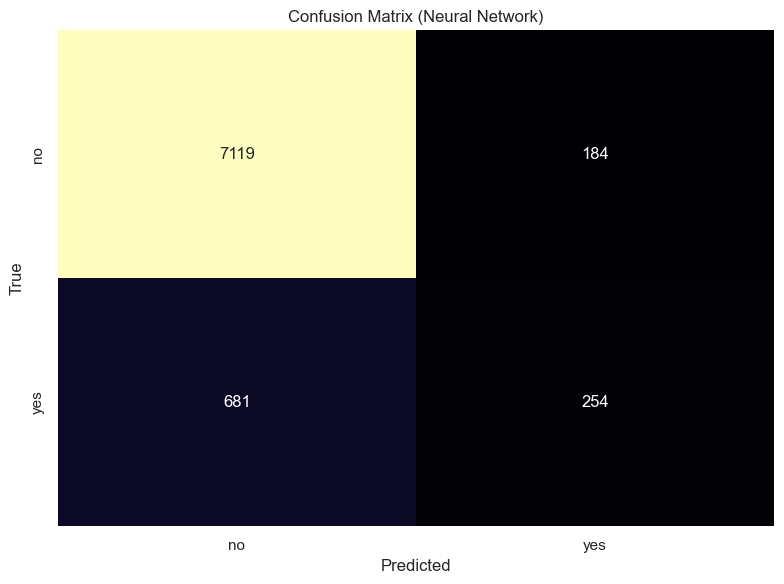

In [110]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Evaluate the Neural Network model
results_nn = model_bal.evaluate(X_test, y_test)
print("\nNeural Network Test Loss:", results_nn[0])
print("Neural Network Test Accuracy:", results_nn[1])

# Make predictions using the Neural Network model
y_pred_nn = (model_bal.predict(X_test) > 0.5).astype("int32")

# Evaluate the Neural Network model using metrics
print("\nClassification Report (Neural Network):")
print(classification_report(y_test, y_pred_nn))

print("\nConfusion Matrix (Neural Network):")
print(confusion_matrix(y_test, y_pred_nn))

# Confusion matrix for Neural Network predictions
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Plot the confusion matrix with a different color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='magma', cbar=False, xticklabels=df["y"].unique(), yticklabels=df["y"].unique())

plt.title('Confusion Matrix (Neural Network)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


In [111]:
from sklearn.ensemble import RandomForestClassifier


rf_model_bal = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_depth=None,         # Maximum depth of trees, None means no limit
    random_state=42,        # Random seed for reproducibility
    class_weight='balanced' # Handle class imbalance
)

# Train the model
rf_model_bal.fit(X_train, y_train)
# Make predictions
y_pred_rf = rf_model_bal.predict(X_test)




Accuracy: 0.8891721291575625

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7303
           1       0.52      0.29      0.37       935

    accuracy                           0.89      8238
   macro avg       0.72      0.63      0.66      8238
weighted avg       0.87      0.89      0.87      8238


Confusion Matrix:
[[7055  248]
 [ 665  270]]


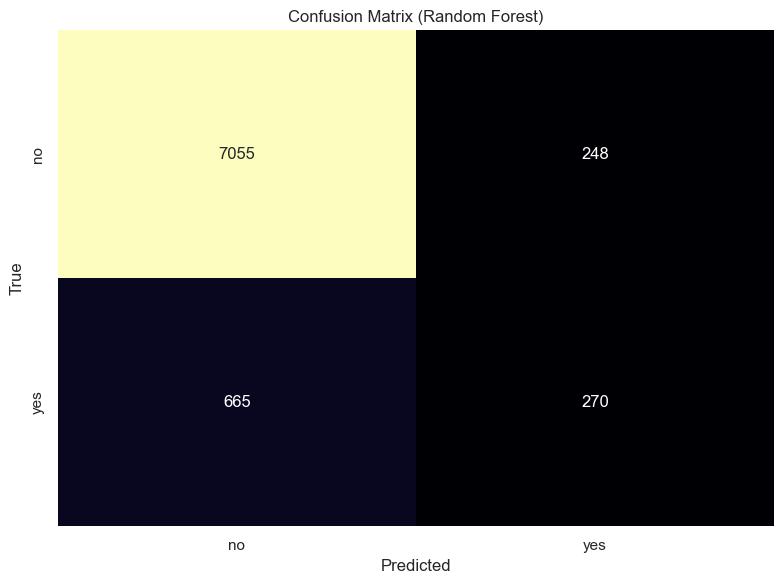

In [112]:
ccuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

# Plot the confusion matrix with a color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='magma', cbar=False, xticklabels=df["y"].unique(), yticklabels=df["y"].unique())

plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

**Explanation**
- In the NN and RF calss(0) f1 score is much higer then Class(1) it wil possibly happens beacuse of the imbalanced dataset
- To reduce this we an use SWOT balance 

258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step


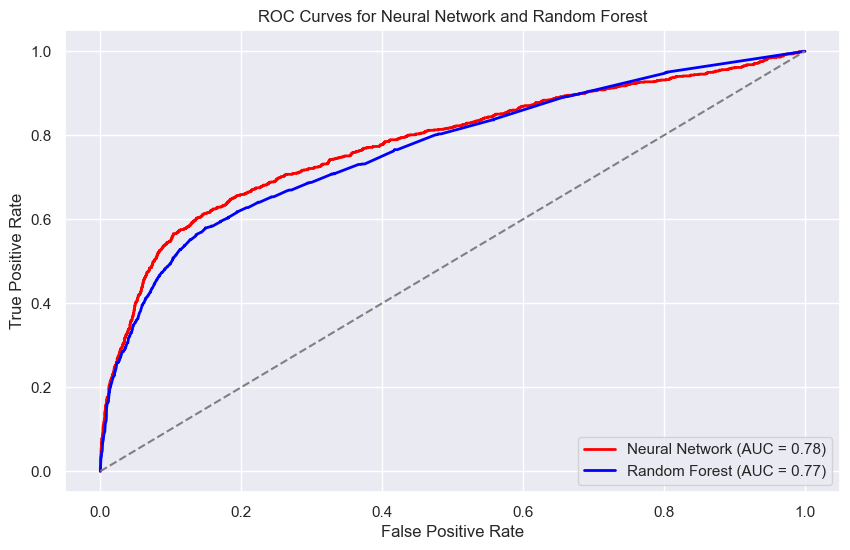

In [113]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for Random Forest (output class probabilities)
y_pred_prob_rf = rf_model_bal.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Compute ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Get predicted probabilities for Neural Network (output class probabilities)
y_pred_prob_nn = model_bal.predict(X_test)[:, 0]  # Probabilities for class 1

# Compute ROC curve for Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_prob_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot ROC curves for both models
plt.figure(figsize=(10, 6))
plt.plot(fpr_nn, tpr_nn, color='red', lw=2, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Neural Network and Random Forest')
plt.legend(loc="lower right")
plt.show()




258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


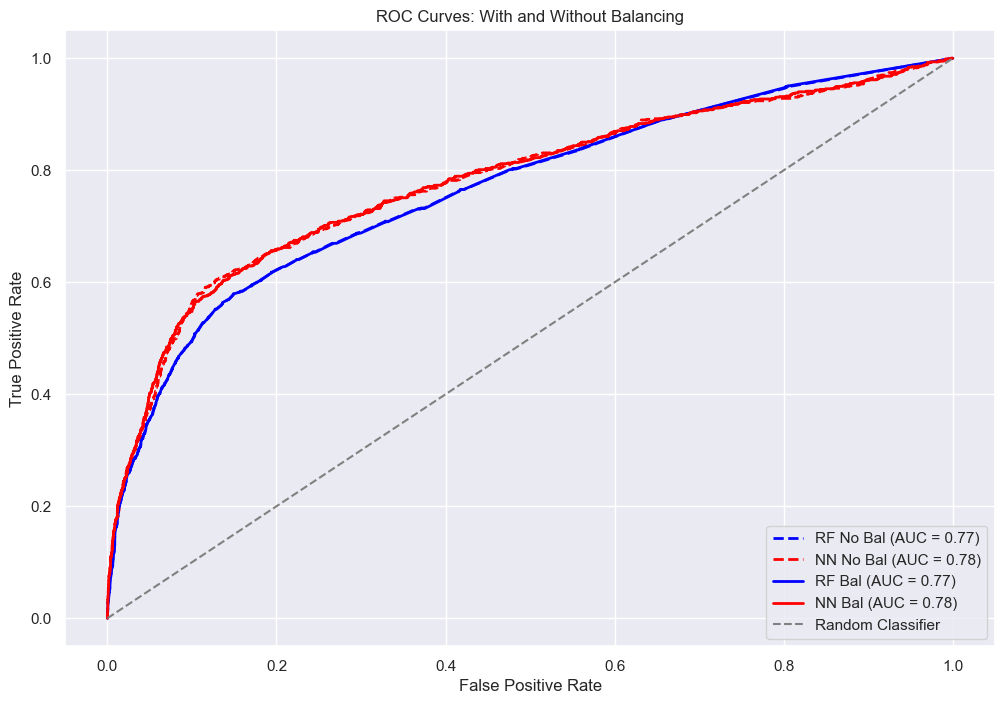

In [114]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predicted probabilities for Random Forest (without balancing)
y_pred_prob_rf_no_bal = rf_model_no_bal.predict_proba(X_test)[:, 1]  # Without balancing
fpr_rf_no_bal, tpr_rf_no_bal, _ = roc_curve(y_test, y_pred_prob_rf_no_bal)
roc_auc_rf_no_bal = auc(fpr_rf_no_bal, tpr_rf_no_bal)

# Predicted probabilities for Neural Network (without balancing)
y_pred_prob_nn_no_bal = model_no_bal.predict(X_test)[:, 0]  # Without balancing
fpr_nn_no_bal, tpr_nn_no_bal, _ = roc_curve(y_test, y_pred_prob_nn_no_bal)
roc_auc_nn_no_bal = auc(fpr_nn_no_bal, tpr_nn_no_bal)

# Predicted probabilities for Random Forest (with balancing)
y_pred_prob_rf_bal = rf_model_bal.predict_proba(X_test)[:, 1]  # With balancing
fpr_rf_bal, tpr_rf_bal, _ = roc_curve(y_test, y_pred_prob_rf_bal)
roc_auc_rf_bal = auc(fpr_rf_bal, tpr_rf_bal)

# Predicted probabilities for Neural Network (with balancing)
y_pred_prob_nn_bal = model_bal.predict(X_test)[:, 0]  # With balancing
fpr_nn_bal, tpr_nn_bal, _ = roc_curve(y_test, y_pred_prob_nn_bal)
roc_auc_nn_bal = auc(fpr_nn_bal, tpr_nn_bal)

# Plot ROC curves
plt.figure(figsize=(12, 8))

# Without balancing
plt.plot(fpr_rf_no_bal, tpr_rf_no_bal, color='blue', linestyle='--', lw=2, label=f'RF No Bal (AUC = {roc_auc_rf_no_bal:.2f})')
plt.plot(fpr_nn_no_bal, tpr_nn_no_bal, color='red', linestyle='--', lw=2, label=f'NN No Bal (AUC = {roc_auc_nn_no_bal:.2f})')

# With balancing
plt.plot(fpr_rf_bal, tpr_rf_bal, color='blue', linestyle='-', lw=2, label=f'RF Bal (AUC = {roc_auc_rf_bal:.2f})')
plt.plot(fpr_nn_bal, tpr_nn_bal, color='red', linestyle='-', lw=2, label=f'NN Bal (AUC = {roc_auc_nn_bal:.2f})')

# Reference line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')

# Labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: With and Without Balancing')
plt.legend(loc="lower right")
plt.show()
